## 0. 介绍

基于 IBM Customer Churn Dataset 经典数据集的分析

数据集地址：[IBM Customer Churn Dataset](https://www.kaggle.com/datasets/yeanzc/telco-customer-churn-ibm-dataset)

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_excel('./data/Telco_customer_churn.xlsx')

In [5]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [6]:
df.shape

(7043, 33)

In [7]:
df.isna().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [8]:
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


In [9]:
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [10]:
cat_cols=['Count', 'Country', 'State', 'City', 'Zip Code',
       'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Churn Label', 'Churn Value',
       'Churn Reason']
for col in cat_cols:
    print(col,":", df[col].unique(),len(df[col].unique()))

Count : [1] 1
Country : ['United States'] 1
State : ['California'] 1
City : ['Los Angeles' 'Beverly Hills' 'Huntington Park' ... 'Standish' 'Tulelake'
 'Olympic Valley'] 1129
Zip Code : [90003 90005 90006 ... 96128 96134 96146] 1652
Gender : ['Male' 'Female'] 2
Senior Citizen : ['No' 'Yes'] 2
Partner : ['No' 'Yes'] 2
Dependents : ['No' 'Yes'] 2
Phone Service : ['Yes' 'No'] 2
Multiple Lines : ['No' 'Yes' 'No phone service'] 3
Internet Service : ['DSL' 'Fiber optic' 'No'] 3
Online Security : ['Yes' 'No' 'No internet service'] 3
Online Backup : ['Yes' 'No' 'No internet service'] 3
Device Protection : ['No' 'Yes' 'No internet service'] 3
Tech Support : ['No' 'Yes' 'No internet service'] 3
Streaming TV : ['No' 'Yes' 'No internet service'] 3
Streaming Movies : ['No' 'Yes' 'No internet service'] 3
Contract : ['Month-to-month' 'Two year' 'One year'] 3
Paperless Billing : ['Yes' 'No'] 2
Payment Method : ['Mailed check' 'Electronic check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 4

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

## 1. 字典研究

- CustomerID	客户唯一标识符  
- Count	客户计数，用于报表  
- Country, State, City, Zip Code, Latitude, Longitude, Lat Long	客户地理位置（国家、省份、城市、邮编、经纬度等）  
---
- Gender	性别（Male/Female）  
- Senior Citizen	是否为老年人（65岁以上）  
- Partner	是否有伴侣  
- Dependents	是否有家属（孩子、父母等）  
---
- Tenure Months	使用时长（月）  
---
- Phone Service	是否订阅电话服务  
- Multiple Lines	是否开通多线路电话  
- Internet Service	网络服务类型（无、DSL、光纤、电缆）  
- Online Security	是否开通网络安全服务
- Online Backup	是否开通网络备份服务
- Device Protection	是否开通设备保护
- Tech Support	是否开通技术支持服务
- Streaming TV	是否看电视流媒体
- Streaming Movies	是否看电影流媒体
---
- Contract	合约类型（月付、1年、2年）
- Paperless Billing	是否使用无纸化账单
- Payment Method	付款方式（银行转账、信用卡、邮寄支票）
---
- Monthly Charge	每月总费用
- Total Charges	总消费金额
---
- Churn Label	是否流失（Yes/No）——主要建模目标
- Churn Value	是否流失（0/1）——可作为标签使用
- Churn Score	IBM 提供的预测评分（0-100）
- CLTV	预测的客户生命周期价值
- Churn Reason	流失原因（如价格问题、技术问题等）

<big>**主要结论：**</big>
1. 共7043条数据，33个字段。除流失原因外，其他没有缺失值。
2. 目标建模字段名称是 Churn Value，1表示流失，0表示未流失。
3. 初步研究，后续建模保留字段：

**人口属性**
- Senior Citizen 是否为老年人（65岁以上）
- Partner 是否有伴侣
- Dependents 是否有家属（孩子、父母等）
  
**客户行为和合约**
- Tenure Months 使用时长（月）
- Contract 合约类型（月付、1年、2年）
- Paperless Billing 是否使用无纸化账单
- Payment Method 付款方式（银行转账、信用卡、邮寄支票）
- Monthly Charge 每月总费用
- Total Charges 总消费金额

**开通服务**
- Phone Service 是否订阅电话服务
- Multiple Lines 是否开通多线路电话
- Internet Service 网络服务类型（无、DSL、光纤、电缆）
- Online Security 是否开通网络安全服务
- Online Backup 是否开通网络备份服务
- Device Protection 是否开通设备保护
- Tech Support 是否开通技术支持服务
- Streaming TV 是否看电视流媒体
- Streaming Movies 是否看电影流媒体

## 2. EDA

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
print(f"{df['Churn Value'].sum()/len(df):.2%}")

26.54%


- 总体的流失率是26.54%
- 对建模来说，数据存在倾斜

<Axes: ylabel='Churn Reason'>

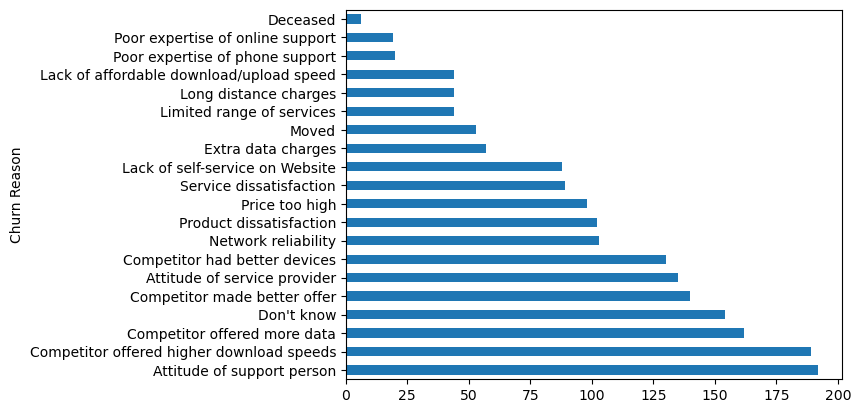

In [14]:
df['Churn Reason'].value_counts().plot(kind='barh')

- 流失的主要原因：支持人员态度、竞争对手网速更快、竞争对手提供更多数据流量
- 流失原因缺失值较多，5000+缺失，原因仅供参考

In [15]:
sorted(df['Internet Service'].unique())

['DSL', 'Fiber optic', 'No']

In [16]:
df['Contract'].unique()

array(['Month-to-month', 'Two year', 'One year'], dtype=object)

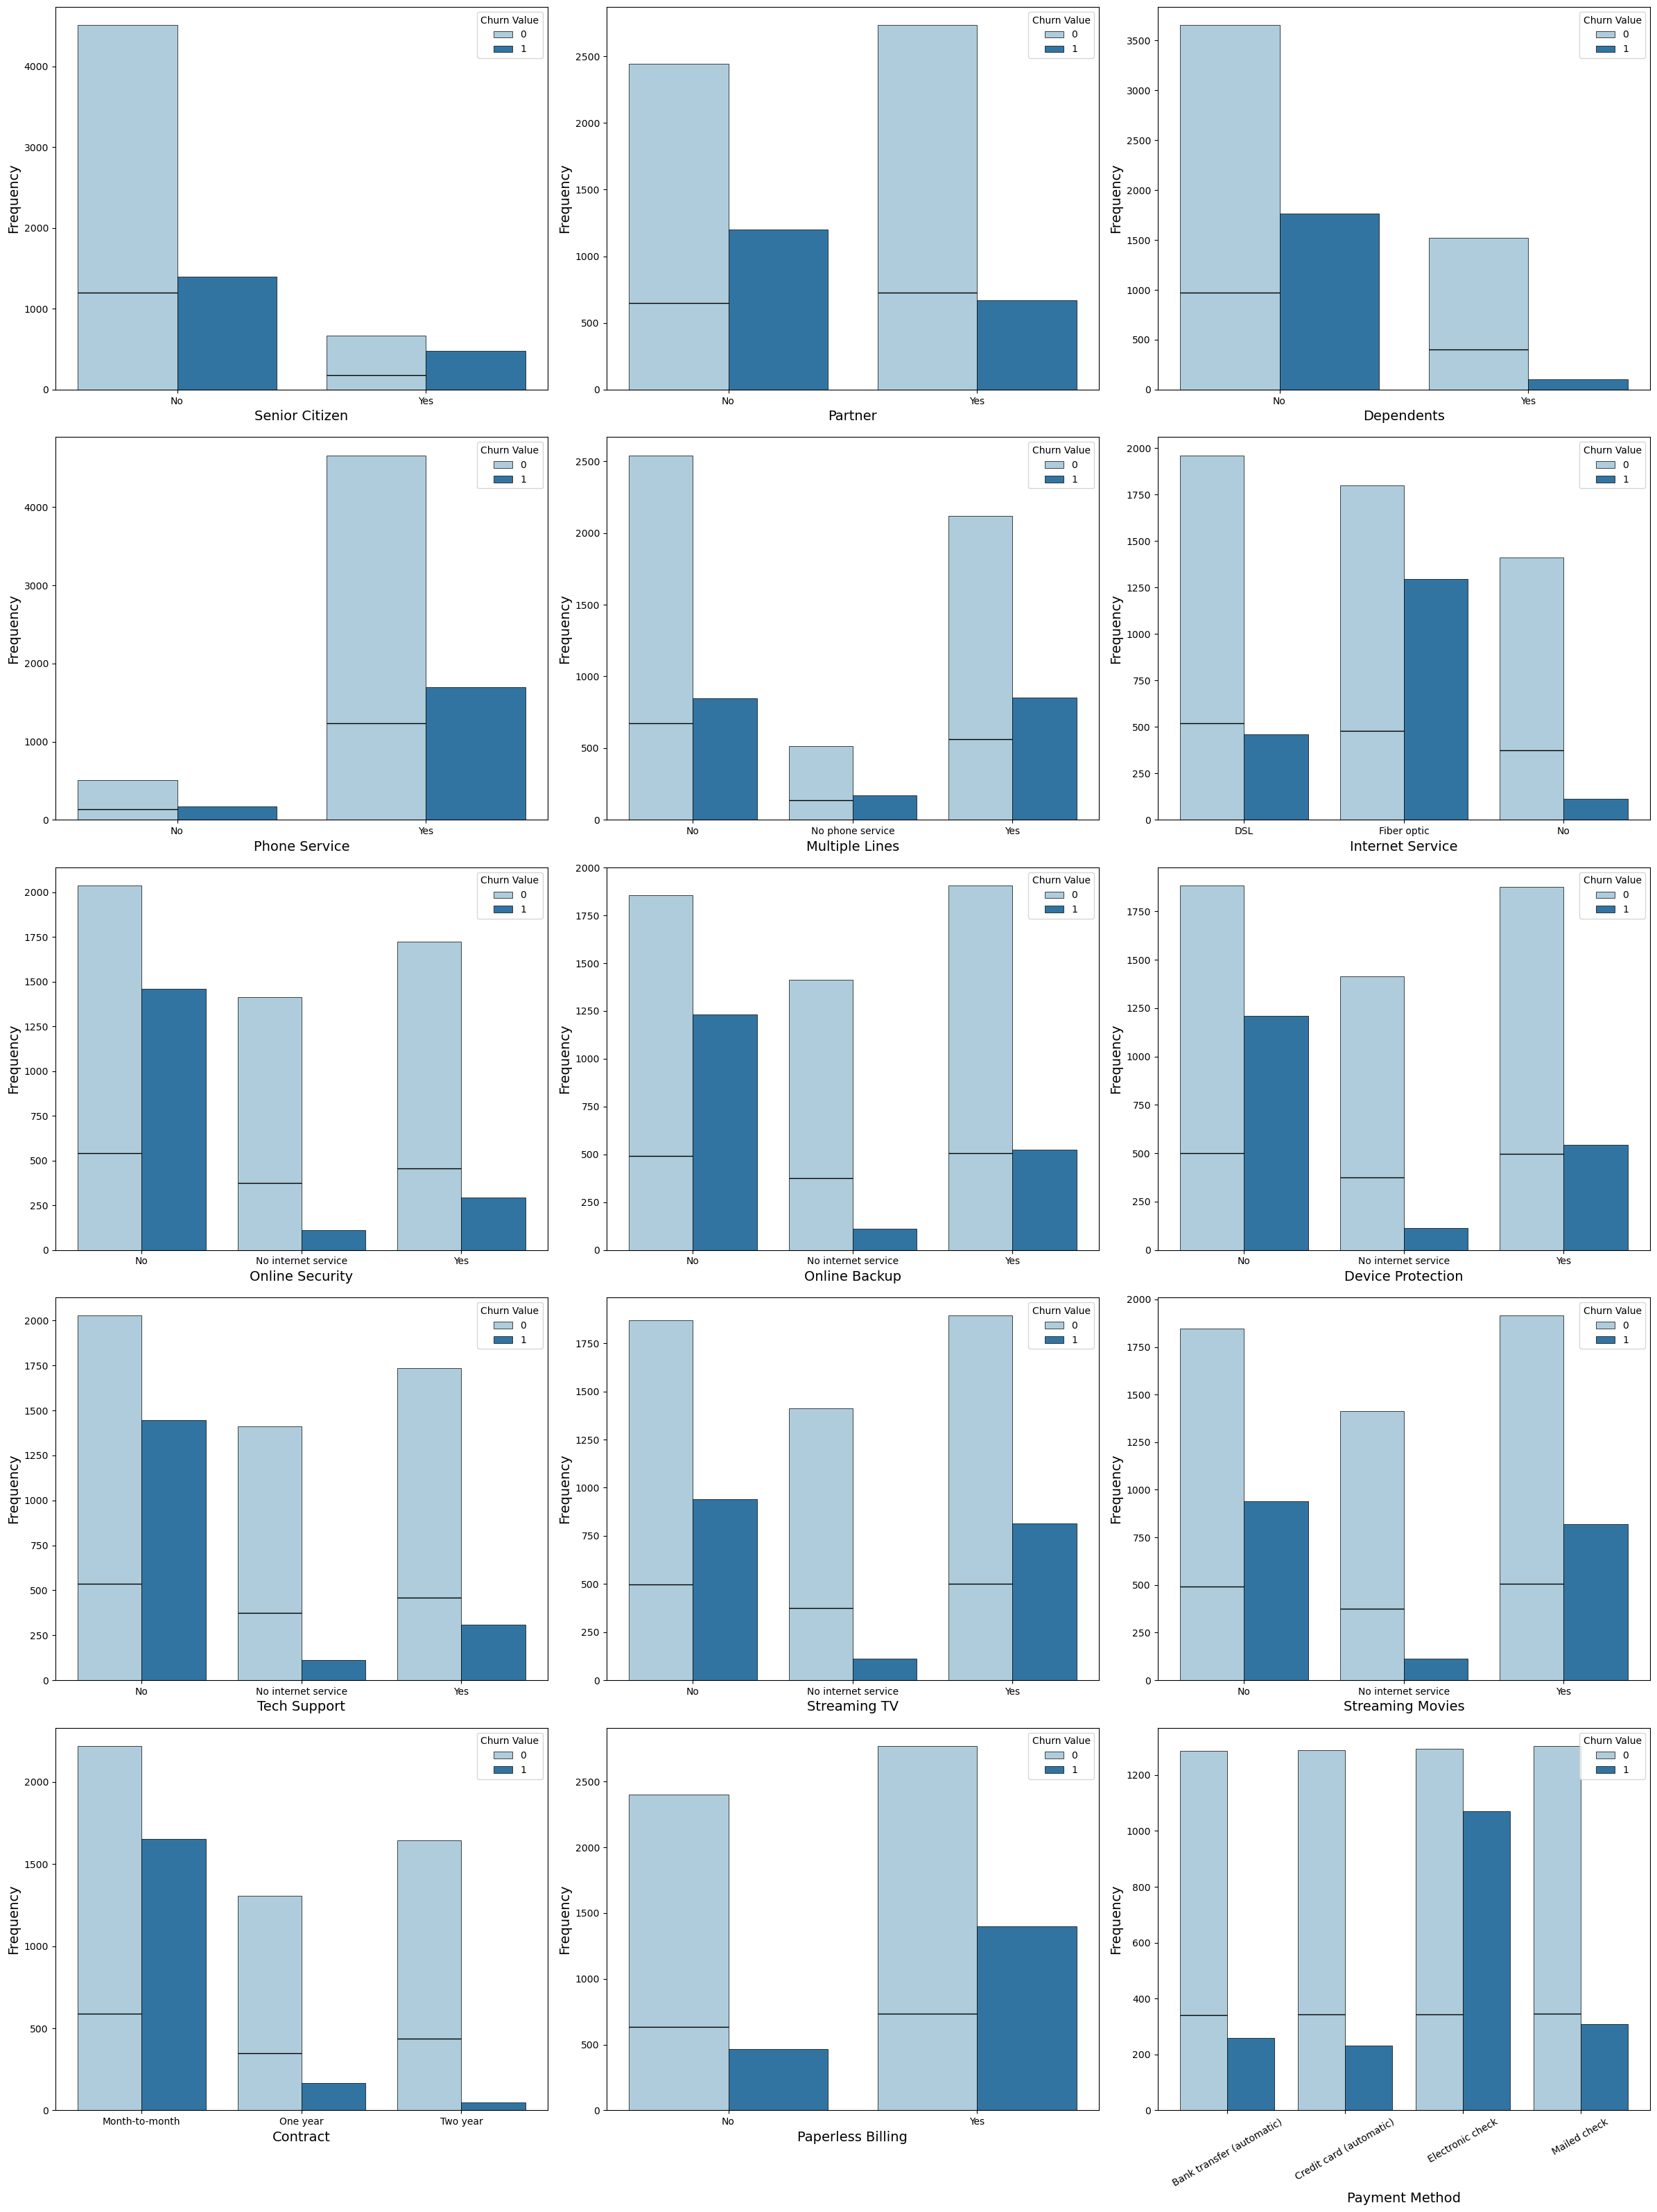

In [17]:
cat_cols=['Senior Citizen',
       'Partner', 'Dependents', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method']
fig, axes = plt.subplots(len(cat_cols)//3,3,figsize=(24,32))
for idx, feature in enumerate(cat_cols):
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]

    group_order = sorted(df[feature].unique(), reverse=False)
    sns.countplot(x=feature, hue='Churn Value', order = group_order,
                  data=df, ax=ax, stat='count', palette='Paired', edgecolor='black', linewidth=.5)
    ax.set_xlabel(feature, fontsize=14)                    
    ax.set_ylabel('Frequency', fontsize=14) 
    
    # 遍历 A 组的每个柱子，绘制百分比基准线
    for bar in ax.containers[0]:
        height = bar.get_height()
        target_height = height * 0.2654
        # 绘制基准线
        ax.hlines(
            y=target_height, xmin=bar.get_x(), xmax=bar.get_x() + bar.get_width(),
            colors='black', linewidth=1, linestyles='-'
        )
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

重点注意两种现象：（1）流失比率显著高于总体水平；（2）组间比例失衡；
- 老年人、没有伴侣、没有家属更容易流失
- 光纤用户、没有开通网络安全服务、没有开通在线备份、没有开通设备保护、没有开通技术服务客户流失比例高
- 月付、无纸化支付、电子支付流失率都显著高于同组其他类别。

In [18]:
object_cols = df.select_dtypes(include=['object']).columns
# 统计每列的空白值数量
blank_counts = {}
for col in object_cols:
    # 检查是否是字符串，且去除空格后是否为空
    blank_mask = df[col].apply(lambda x: isinstance(x, str) and x.strip() == '')
    blank_counts[col] = blank_mask.sum()

print("空白值统计:")
print(blank_counts)

空白值统计:
{'CustomerID': 0, 'Country': 0, 'State': 0, 'City': 0, 'Lat Long': 0, 'Gender': 0, 'Senior Citizen': 0, 'Partner': 0, 'Dependents': 0, 'Phone Service': 0, 'Multiple Lines': 0, 'Internet Service': 0, 'Online Security': 0, 'Online Backup': 0, 'Device Protection': 0, 'Tech Support': 0, 'Streaming TV': 0, 'Streaming Movies': 0, 'Contract': 0, 'Paperless Billing': 0, 'Payment Method': 0, 'Total Charges': 11, 'Churn Label': 0, 'Churn Reason': 0}


In [19]:
# 查看包含空白值的行
for col in object_cols:
    blank_rows = df[df[col].apply(lambda x: isinstance(x, str) and x.strip() == '')]
    if not blank_rows.empty:
        print(f"列 '{col}' 的空白值所在行索引:", blank_rows.index.tolist())

列 'Total Charges' 的空白值所在行索引: [2234, 2438, 2568, 2667, 2856, 4331, 4687, 5104, 5719, 6772, 6840]


In [20]:
# 将空白字符串替换为 NaN
df[object_cols] = df[object_cols].apply(
    lambda x: x.replace(r'^\s*$', pd.NA, regex=True)
)

In [21]:
df['Total Charges'].isna().sum()

11

In [22]:
df = df.dropna(subset='Total Charges')
df.shape

(7032, 33)

In [23]:
df['Total Charges'] = df['Total Charges'].astype(float)
df.shape

(7032, 33)

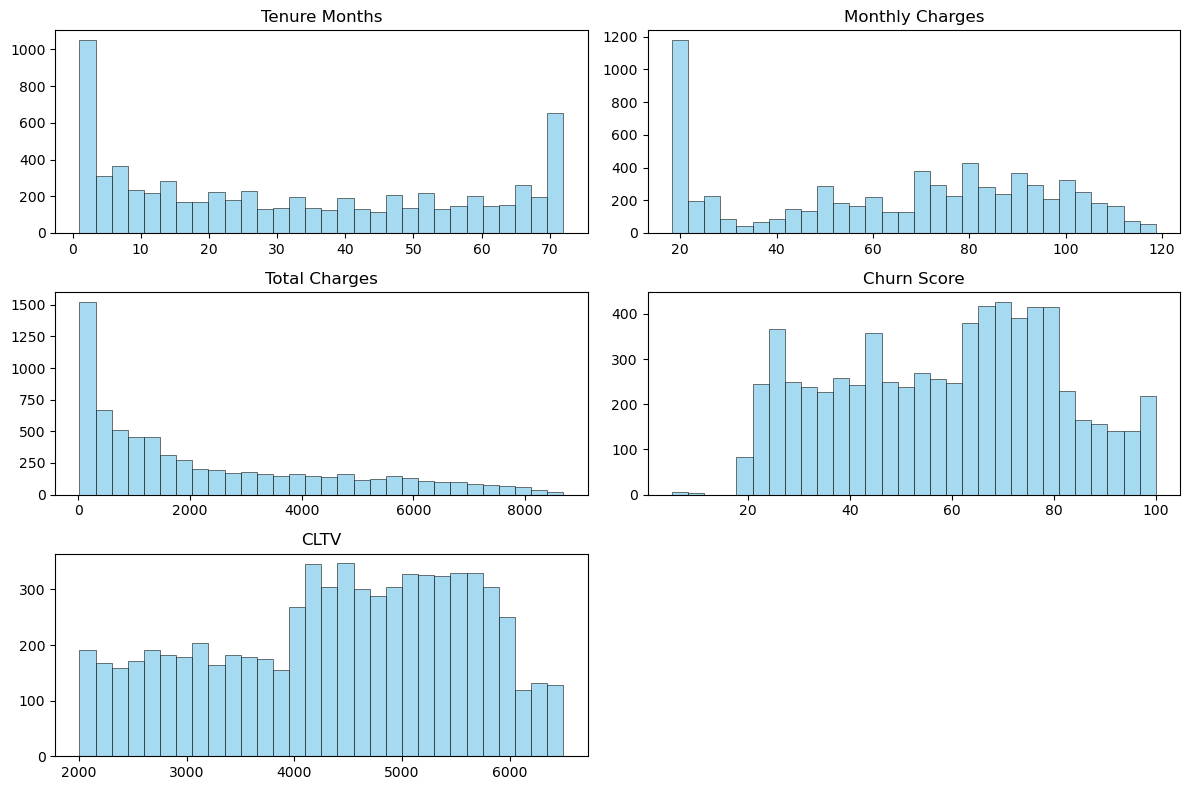

In [24]:
num_cols = ['Tenure Months', 'Monthly Charges', 'Total Charges', 'Churn Score', 'CLTV']
df[num_cols].hist(bins=30, figsize=(12, 8), grid=False, color='skyblue', alpha=0.75,edgecolor='black', linewidth=.5)
plt.tight_layout()
plt.show()

主要发现：
- 使用期限，剔除两端，分布均匀，从5个月到65个月，5个月到5.5年
- 每月付费，20左右单峰，80左右正态分布
- 总付费，长尾分布
- Churn Score，可分三组：20-60；60-80；80+
- CLTV，可分三组：2000-4000；4000-6000；6000+

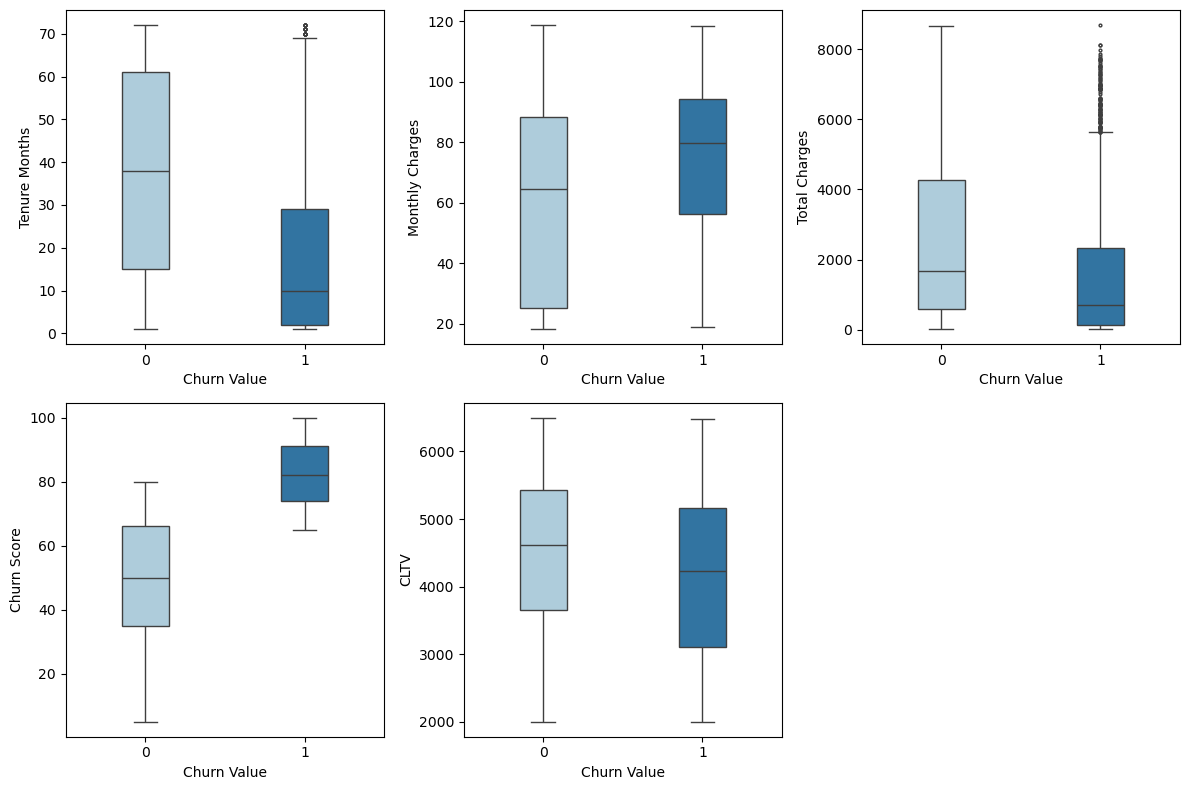

In [25]:
# 数值特征的箱线图（按 Churn 分组）
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='Churn Value', y=col, data=df, hue='Churn Value',palette='Paired', width=0.3, linewidth=1, fliersize=2, legend=False)
    # plt.title(f'{col}')
plt.tight_layout()
plt.show()

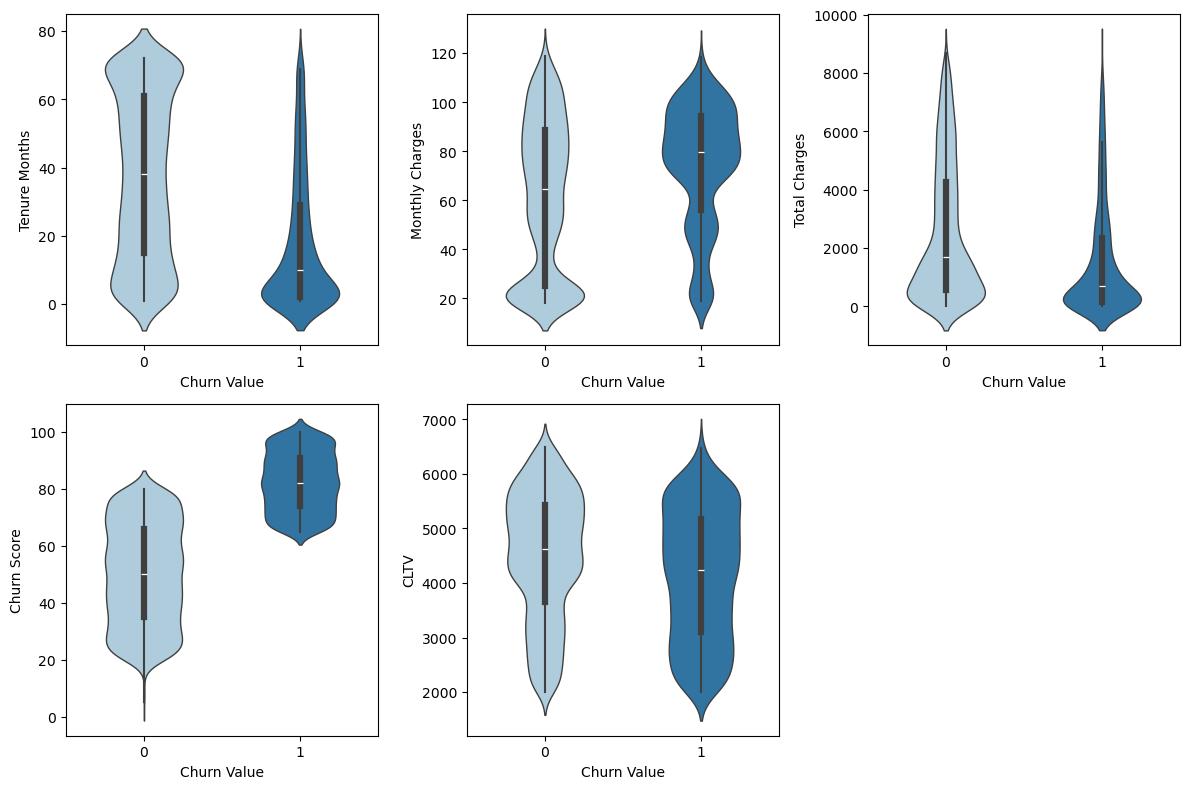

In [26]:
# 数值特征的小提琴图（按 Churn 分组）
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i+1)
    sns.violinplot(x='Churn Value', y=col, data=df, hue='Churn Value',palette='Paired', width=0.5, linewidth=1, legend=False)
    # plt.title(f'{col}')
plt.tight_layout()
plt.show()

主要发现：
- 结合图1和图2：流失用户有使用时间短+月支付高的特点
- 流失用户总支付存在很多异常值，但总支付是长尾分布，加之数据不均，有异常值是正常的。但也说明，很多高价值用户流失。
- Churn Score是一个较好的预警指标，流失组分数显著高于非流失组。热点图也说明了这点。

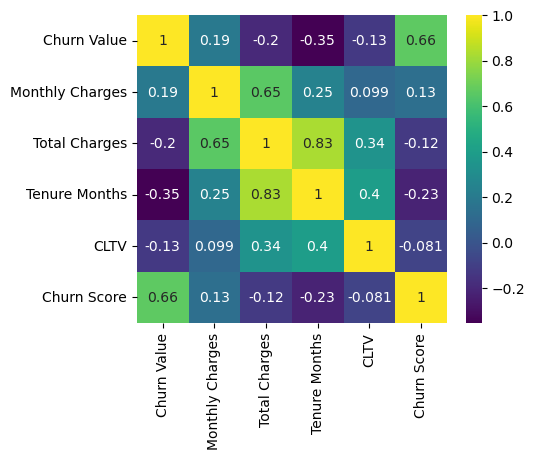

In [27]:
# df['Total Charges'].str.replace(' ', '').astype(float)
num_cols = ['Churn Value','Monthly Charges','Total Charges','Tenure Months', 'CLTV', 'Churn Score']
plt.figure(figsize=(5,4))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='viridis')
plt.show()

## 3. 编码

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
df_dummies = pd.get_dummies(df, columns=['Senior Citizen',
       'Partner', 'Dependents', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Paperless Billing', 'Payment Method'], drop_first=True, dtype=int)

In [30]:
df_dummies.Contract.unique()

array(['Month-to-month', 'Two year', 'One year'], dtype=object)

In [31]:
contract_mapping = {'Month-to-month': 0, 'One year': 1, 'Two year': 2}
df_dummies['Contract_encoded'] = df_dummies['Contract'].map(contract_mapping)

In [32]:
df_dummies.isna().sum()

CustomerID                                   0
Count                                        0
Country                                      0
State                                        0
City                                         0
Zip Code                                     0
Lat Long                                     0
Latitude                                     0
Longitude                                    0
Gender                                       0
Tenure Months                                0
Contract                                     0
Monthly Charges                              0
Total Charges                                0
Churn Label                                  0
Churn Value                                  0
Churn Score                                  0
CLTV                                         0
Churn Reason                              5163
Senior Citizen_Yes                           0
Partner_Yes                                  0
Dependents_Ye

## 4. 建模和调参

In [63]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb
import lightgbm as lgb

In [34]:
sub_cols=['Churn Value','Tenure Months', 'Monthly Charges', 'Total Charges',
          'Senior Citizen_Yes', 'Partner_Yes', 'Dependents_Yes',
       'Phone Service_Yes', 'Multiple Lines_No phone service',
       'Multiple Lines_Yes', 'Internet Service_Fiber optic',
       'Internet Service_No', 'Online Security_No internet service',
       'Online Security_Yes', 'Online Backup_No internet service',
       'Online Backup_Yes', 'Device Protection_No internet service',
       'Device Protection_Yes', 'Tech Support_No internet service',
       'Tech Support_Yes', 'Streaming TV_No internet service',
       'Streaming TV_Yes', 'Streaming Movies_No internet service',
       'Streaming Movies_Yes', 'Paperless Billing_Yes',
       'Payment Method_Credit card (automatic)',
       'Payment Method_Electronic check', 'Payment Method_Mailed check',
       'Contract_encoded']

In [35]:
data = df_dummies[sub_cols]
data.shape

(7032, 29)

In [36]:
X = data.drop('Churn Value', axis=1)
y = data['Churn Value']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [38]:
standard_cols = ['Monthly Charges', 'Total Charges', 'Tenure Months']
scaler = StandardScaler()
X_train[standard_cols] = scaler.fit_transform(X_train[standard_cols])
X_test[standard_cols] = scaler.transform(X_test[standard_cols])

In [39]:
lr_model = LogisticRegression()

In [40]:
lr_params = {'C':[1, 2, 3, 5, 7],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [41]:
lr_grid= GridSearchCV(lr_model, lr_params, cv=5, scoring='roc_auc')

In [42]:
lr_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 5, 7], 'penalty': ['l2'],
                         'solver': ['lbfgs']},
             scoring='roc_auc')

In [43]:
dt_model = DecisionTreeClassifier()

In [44]:
dt_params = {'max_depth': [3, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

In [45]:
dt_grid = GridSearchCV(dt_model, dt_params, cv=5, scoring='roc_auc')

In [46]:
dt_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, 15],
                         'min_samples_split': [2, 5, 10]},
             scoring='roc_auc')

In [47]:
rf_model = RandomForestClassifier()

In [48]:
rf_params = {'n_estimators': [100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

In [49]:
rf_grid = GridSearchCV(rf_model, rf_params, cv=5, scoring='roc_auc')

In [50]:
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200]},
             scoring='roc_auc')

In [51]:
xgb_model = xgb.XGBClassifier(eval_metric='logloss')

In [52]:
xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1]
}

In [53]:
xgb_grid = GridSearchCV(xgb_model, xgb_params, cv=5, scoring='roc_auc')

In [54]:
import sklearn
sklearn.__version__

'1.6.1'

In [55]:
import xgboost
xgboost.__version__

'2.1.4'

In [56]:
xgb_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 10], 'n_estimators': [100, 200],
                         'subsample': [0.8, 1]},
             scoring='roc_auc')

In [57]:
lgb_model = lgb.LGBMClassifier(verbose=-1)

In [58]:
lgb_params =  {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, 20],
    'learning_rate': [0.01, 0.1, 0.2],
    'num_leaves': [15, 31, 63]
}

In [59]:
lgb_grid = GridSearchCV(lgb_model, lgb_params, cv=5, scoring='roc_auc')

In [60]:
lgb_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LGBMClassifier(verbose=-1),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [5, 10, 15, 20],
                         'n_estimators': [100, 200, 300],
                         'num_leaves': [15, 31, 63]},
             scoring='roc_auc')

## 5. 模型评估

In [64]:
results = []
roc_curves = {}
conf_matrices = {}

def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)

    # 存储结果
    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-score': f1,
        'AUC': auc
    })

    # 存储 ROC 曲线
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_curves[name] = (fpr, tpr)

    # 存储混淆矩阵
    conf_matrices[name] = confusion_matrix(y_test, y_pred)

In [65]:
evaluate_model("Logistic Regression", lr_grid.best_estimator_, X_test, y_test)
evaluate_model("Decision Tree", dt_grid.best_estimator_, X_test, y_test)
evaluate_model("Random Forest", rf_grid.best_estimator_, X_test, y_test)
evaluate_model("XGBoost", xgb_grid.best_estimator_, X_test, y_test)
evaluate_model("LightGBM", lgb_grid.best_estimator_, X_test, y_test)

In [66]:
df_results = pd.DataFrame(results)
print(df_results.sort_values(by='AUC', ascending=False))

                 Model  Accuracy  Precision    Recall  F1-score       AUC
4             LightGBM  0.800284   0.645768  0.550802  0.594517  0.847405
2        Random Forest  0.800284   0.643963  0.556150  0.596844  0.844151
3              XGBoost  0.803127   0.645646  0.574866  0.608204  0.844099
0  Logistic Regression  0.805259   0.642857  0.601604  0.621547  0.843235
1        Decision Tree  0.777541   0.566449  0.695187  0.624250  0.833628


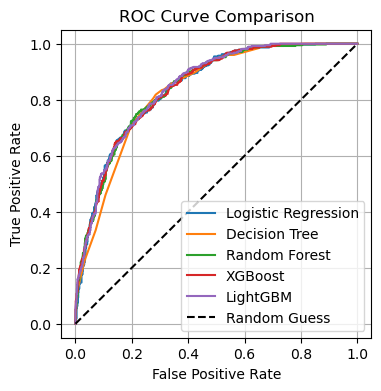

In [70]:
plt.figure(figsize=(4, 4))
for name, (fpr, tpr) in roc_curves.items():
    plt.plot(fpr, tpr, label=f'{name}')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()

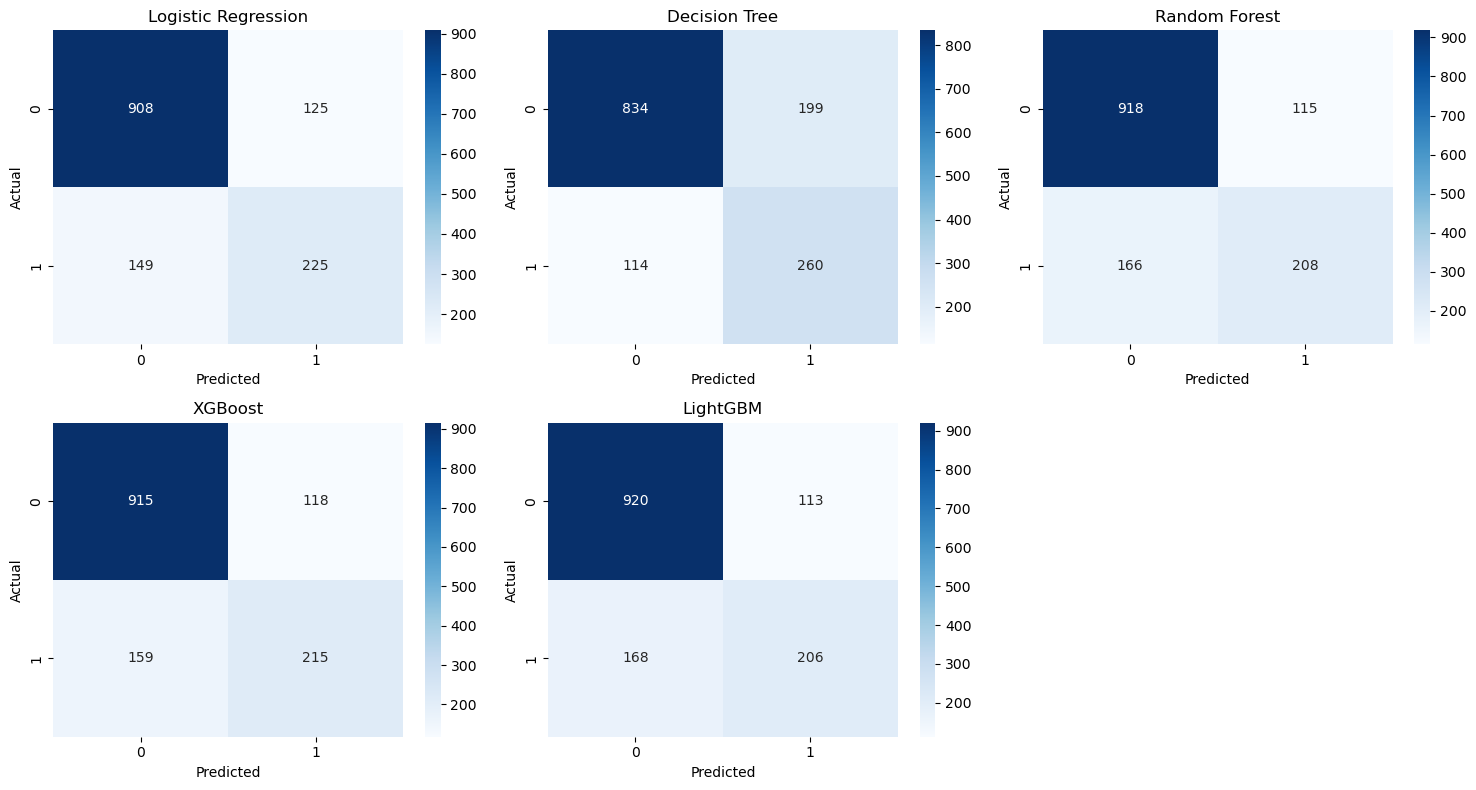

In [71]:
# 获取模型个数
n_models = len(conf_matrices)
cols = 3  # 每行最多3个图
rows = (n_models + cols - 1) // cols  # 向上取整

fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))

# 将 axes 展平为一维数组，方便索引
axes = axes.flatten()

for i, (name, matrix) in enumerate(conf_matrices.items()):
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'{name}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

# 去除多余的子图坐标轴
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

C:\miniconda3\envs\data_science\lib\site-packages\shap\explainers\_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


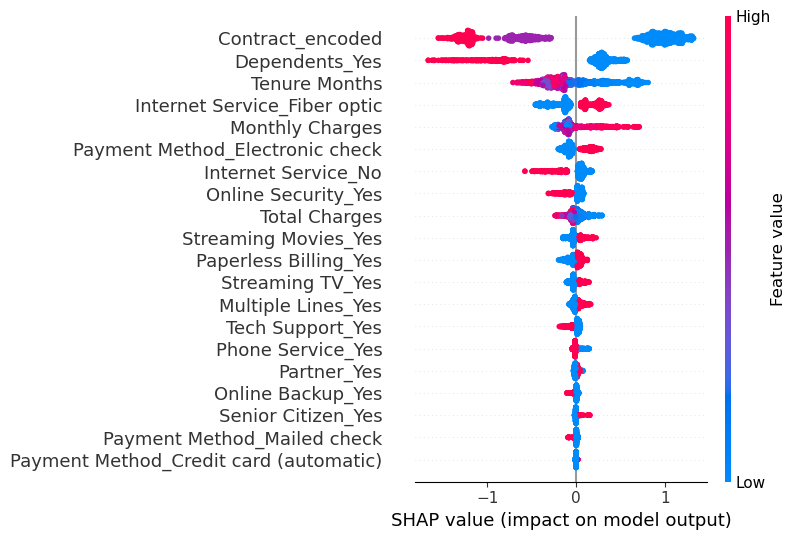

In [84]:
import shap

model = lgb_grid.best_estimator_

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, plot_size=.2)

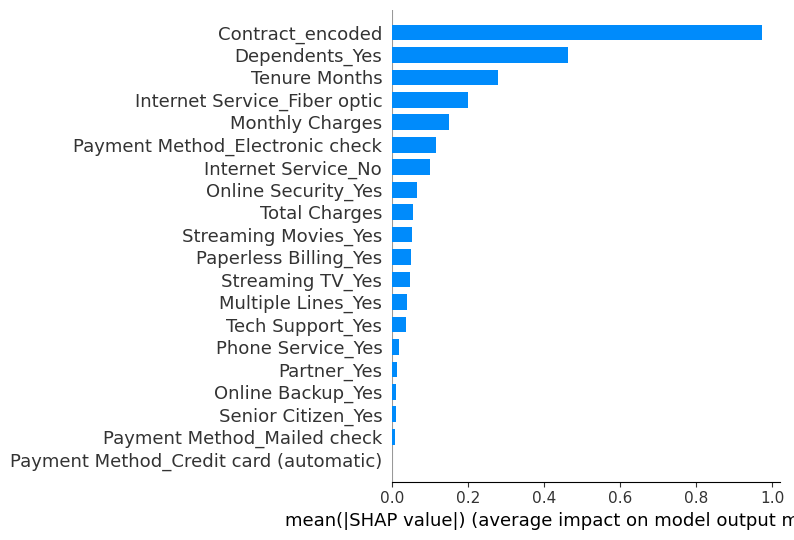

In [101]:
# 取每个特征的SHAP值的绝对值的平均值作为该特征的重要性
shap.summary_plot(shap_values, X, plot_type="bar", plot_size=.2)

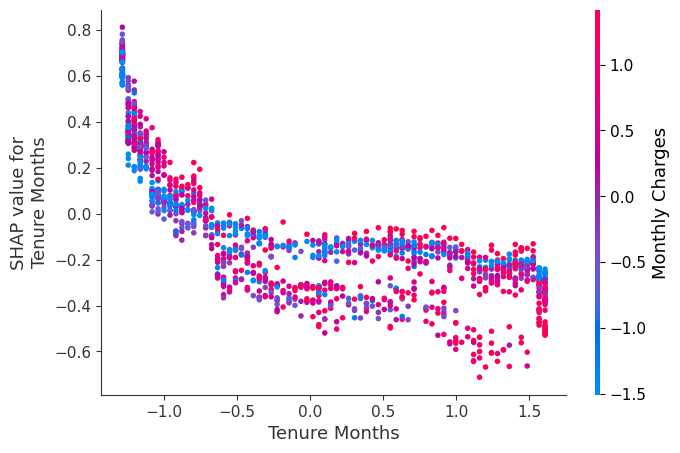

In [99]:
# 特征依赖
shap.dependence_plot("Tenure Months", shap_values, X_test, interaction_index='Monthly Charges')

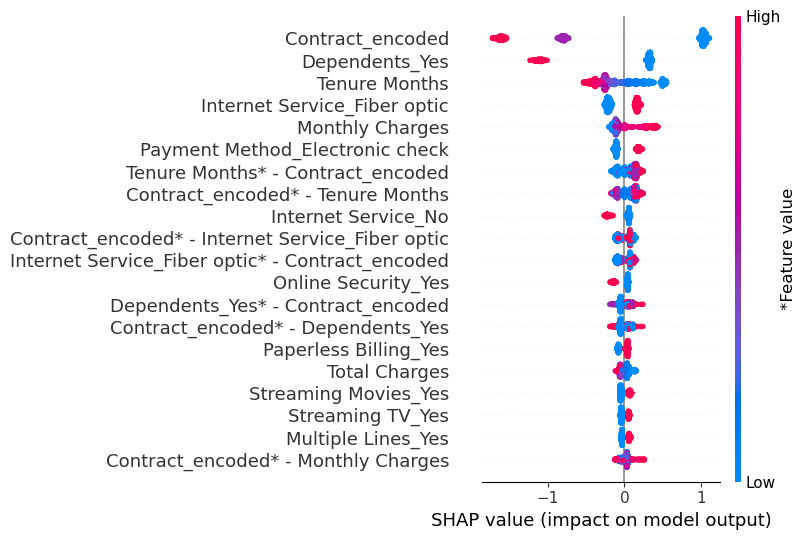

In [105]:
shap_interaction_values = explainer.shap_interaction_values(X_test)
shap.summary_plot(shap_interaction_values, X_test, max_display=20, plot_type="compact_dot", plot_size=.2)

In [107]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[1], X_test.iloc[1])

## 6. 简要报告

1. 项目背景和目标
2. EDA和特征工程
3. 模型选择和对比
4. 解释性分析
5. 业务洞察和建议
   - 主要因素（前五）：合约类型、是否有家属、使用时长、月付费、是否是光纤用户
   - 月付费合约×使用时长短×月付费高→成本敏感，缺乏锁定机制→长期合约优惠政策
   - 无家属用户更易流失→缺乏依赖性和稳定性→推送家庭套餐
   - 光纤用户流失率高→客户群体未覆盖→推出新产品覆盖该用户群体；或探索和家庭用户绑定机制（移动+固定）
   - 服务越少越容易流失→优惠政策吸引用户进行体验→深度捆绑销售
7. 部署建议与后续提升
   - 增加新的数据，如用户满意度
   - 定期更新模型
   - 给每个客户打分，预测流失，进行预警